In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.cm import get_cmap
import geopandas as gpd

In [37]:
# script to turn csv file into a sql query creating a table based on that file
def csv_to_create(csv_file, new_table_name):
    data = pd.read_csv(csv_file)
    data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('+', '_plus')
    table_name = new_table_name
    sql_script = f"CREATE TABLE {table_name} (\n"
    for column in data.columns:
        column_type = data[column].dtype
        if column_type == 'object':
            column_type = 'TEXT'
        elif column_type == 'int64':
            column_type = 'INTEGER'
        elif column_type == 'float64':
            column_type = 'REAL'
        sql_script += f"    {column} {column_type},\n"
    sql_script = sql_script.rstrip(',\n')  # Remove the trailing comma
    sql_script += "\n);"
    print(sql_script)
    

In [62]:
def outliers(csv_file, category_column, numeric_column):
    df = pd.read_csv(csv_file)
    mean = df[numeric_column].mean()
    print('Mean: ' + str(mean))
    std_dev = df[numeric_column].std()
    print('Standard Deviation: ' + str(std_dev))
    lower_bound = mean - (3 * std_dev)
    upper_bound = mean + (3 * std_dev)
    
    # Filter the dataframe to only include rows where the numeric column value is outside the bounds
    outliers_df = df[(df[numeric_column] < lower_bound) | (df[numeric_column] > upper_bound)]
    
    # Iterate over the outliers and print the category and numeric column value
    for index, row in outliers_df.iterrows():
        print(f"State: {row[category_column]}, Value: {row[numeric_column]}")

In [63]:
outliers('COVID19_state.csv', 'State', 'Pollution')

Mean: 7.413725490196078
Standard Deviation: 1.4575348514314352
State: California, Value: 12.8


In [66]:
outliers('state_summary_cp.csv', 'state', 'avg_mean_commute')

Mean: 23.399301205788877
Standard Deviation: 3.719848954966405
State: Alaska, Value: 11.1999999079211


In [ ]:
def top_bottom(csv_file, category_column, numeric_column):
    df = pd.read_csv(csv_file)
    data_sorted = df.sort_values(numeric_column)
    top3 = data_sorted.tail(3)
    bottom3 = data_sorted.head(3)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # Plotting the top 3 states
    for state in top3[category_column]:
         plt.plot(data[data[category_column] == state]['year'], data[data['state'] == state][numeric_column], label=state)
    plt.title('Top 3 States - Total Population Change')
    plt.xlabel('Year')
    plt.ylabel('Total Population Change')
    plt.legend()

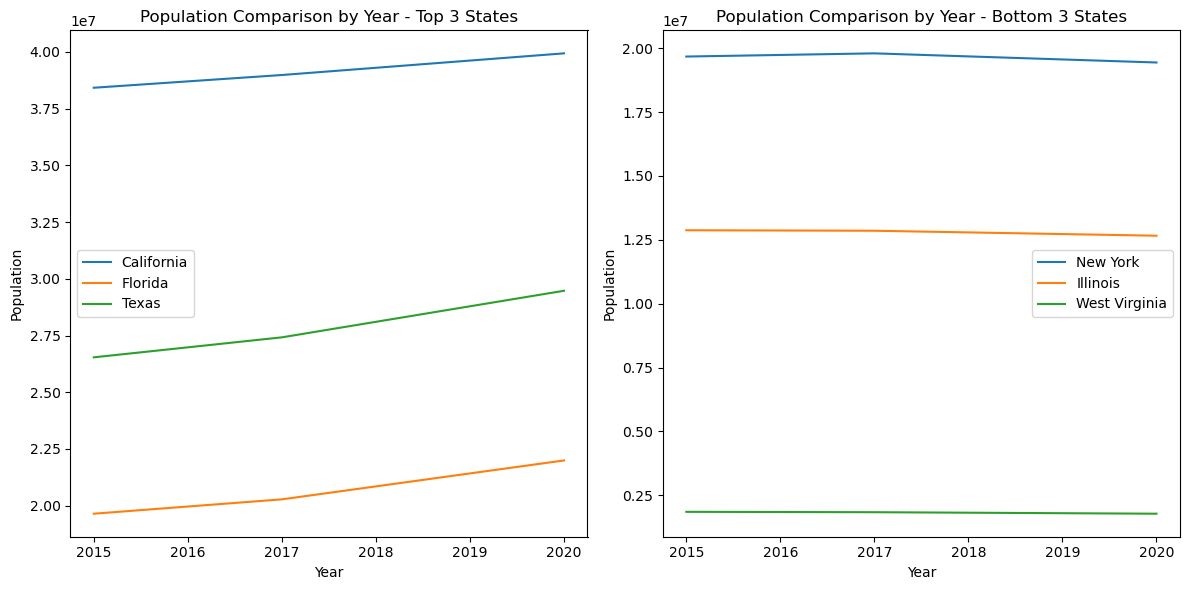

In [9]:
data = pd.read_csv('pop_over_time.csv')

# Sort the DataFrame based on the total population change
data_sorted = data.sort_values('total_population_change')

# Select the top 3 and bottom 3 states based on total population change
top3 = data_sorted.tail(3)
bottom3 = data_sorted.head(3)

# Concatenate the top 3 and bottom 3 dataframes
selected_data = pd.concat([top3, bottom3])

# Create two subplots for side-by-side graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot line graph for the top 3 states
for index, row in top3.iterrows():
    state = row['state']
    population_2015 = row['population_2015']
    population_2017 = row['population_2017']
    population_2020 = row['population_2020']
    ax1.plot([2015, 2017, 2020], [population_2015, population_2017, population_2020], label=state)

ax1.set_title('Population Comparison by Year - Top 3 States')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population')
ax1.legend()

# Plot line graph for the bottom 3 states
for index, row in bottom3.iterrows():
    state = row['state']
    population_2015 = row['population_2015']
    population_2017 = row['population_2017']
    population_2020 = row['population_2020']
    ax2.plot([2015, 2017, 2020], [population_2015, population_2017, population_2020], label=state)

ax2.set_title('Population Comparison by Year - Bottom 3 States')
ax2.set_xlabel('Year')
ax2.set_ylabel('Population')
ax2.legend()

plt.tight_layout()
plt.show()

In [20]:
def quick_state_vis(csv_file, numeric_column, color='Blues'):
    data = gpd.read_file(csv_file)
    data[numeric_column] = pd.to_numeric(data[numeric_column], errors='coerce')
    data = data.sort_values(by=numeric_column, ascending=False)
    data['rank'] = range(1, len(data) + 1)

    fig, ax = plt.subplots(figsize=(12, 8))
    data.plot(column=numeric_column, cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
              legend_kwds={'label': 'Rank'}, legend_ncol=2, legend_fontsize=10,
              legend_title_fontsize=12, categorical=False)

    ax.set_title(f'Relative Rank of US States by {numeric_column}')
    ax.axis('off')

    # Add state labels to the plot
    for x, y, label in zip(data.geometry.centroid.x, data.geometry.centroid.y, data['state']):
        if np.isfinite(x) and np.isfinite(y):
            ax.text(x, y, label, fontsize=8, ha='center', va='center')

    plt.show()

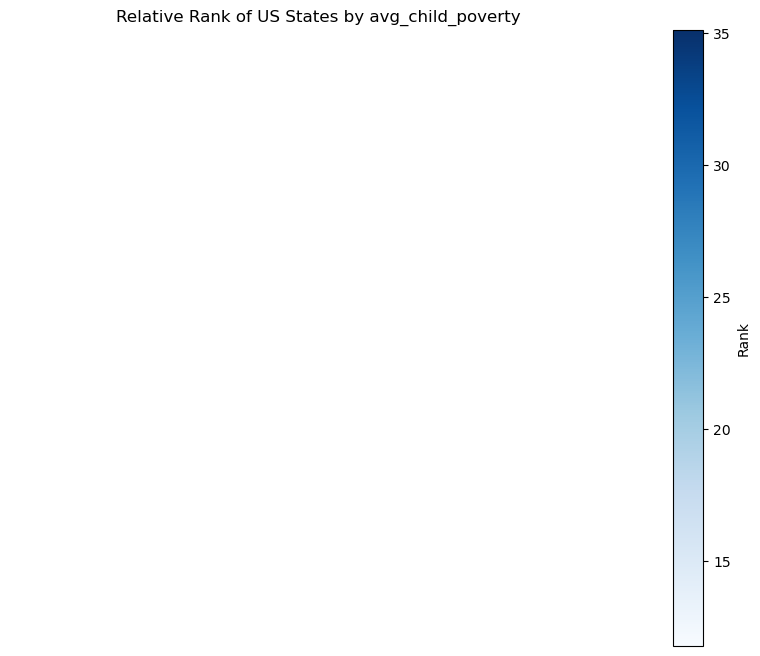

In [24]:
quick_state_vis('state_summary_cp.csv', 'avg_child_poverty')